In [1]:
# First, we will load required packages
library(tidyverse)
library(repr)
library(readxl)
library(infer)

library(knitr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Introduction

Car accidents have been among the leading causes of injuries and deaths around the world, leading all causes of preventable deaths globally in 2019 at nearly 1.3 million. (“International Overview,” n.d.). Furthermore, according to Transport Canada, environmental factors have consistently made up around or over 20% of all causes of car accidents in the country from 2015 to 2019 (Transport Canada, 2021). This project aims to investigate the relationship between the time of year and the occurrence of car accidents in Vancouver.

Taken from the Vancouver Police Department website, our dataset originally includes all crimes that occurred in the West Point Grey neighbourhood from 2003 to 2022 with relevant information recorded in separate variable columns (the headers of each column are shown in the parentheses):
- Type of crime (TYPE)
- Year of occurrence (YEAR)
- Month of occurrence (MONTH)
- Day of occurrence (DAY)
- Hour of occurrence (HOUR)
- Minute of occurrence (MINUTE)
- Hundred block of location (HUNDRED_BLOCK)
- Neighbourhood of location (NEIGHBOURHOOD)
- X-coordinate of location (X)
- Y-coordinate of location (Y)
Of all crimes, our crime types of interest are “Vehicle Collision or Pedestrian Struck (with Fatality)” and “Vehicle Collision or Pedestrian Struck (with Injury)”. The rest of the crimes will be filtered out.

Our inferential question will be to estimate the proportions of car accidents that happen in the summer (which we classify as April to September) and the proportion of car accidents that happen winter (which we classify as October to March) in Vancouver from 2003 to 2022, using the West Point Grey neighbourhood as a sample. We will then examine the difference in the two proportions to help us reach a possible conclusion.



## Preliminary Exploratory Data Analysis

In [2]:
# Data source: 
url <- "https://raw.githubusercontent.com/bernie-leung/STAT-201-group20newrepo/main/crimedata_csv_West%20Point%20Grey_AllYears.csv?token=GHSAT0AAAAAABWZIEUMCDZNWHJBZOIGRVVYYW4QFGA"

# Read data source
crimes <- read_csv(url)
head(crimes)

Rows: 9247 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027
Break and Enter Commercial,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013


In [3]:
# created a data frame contraining only the crime types of interest 
collisions <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    mutate(MONTH = as_factor(MONTH))
    
head(collisions)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Vehicle Collision or Pedestrian Struck (with Fatality),2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357
Vehicle Collision or Pedestrian Struck (with Fatality),2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806
Vehicle Collision or Pedestrian Struck (with Fatality),2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394
Vehicle Collision or Pedestrian Struck (with Fatality),2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336


In [4]:
# data frame that has been grouped by month and Number of observations for each month

collisions_by_month <- collisions %>%
    group_by(MONTH) %>%
    summarise(count = sum(MONTH == MONTH))

# Table: how many observations for each month

kable(collisions_by_month, caption = "Number of observations for each month")




Table: Number of observations for each month

|MONTH | count|
|:-----|-----:|
|1     |    27|
|2     |    21|
|3     |    28|
|4     |    33|
|5     |    41|
|6     |    32|
|7     |    42|
|8     |    38|
|9     |    38|
|10    |    37|
|11    |    27|
|12    |    20|

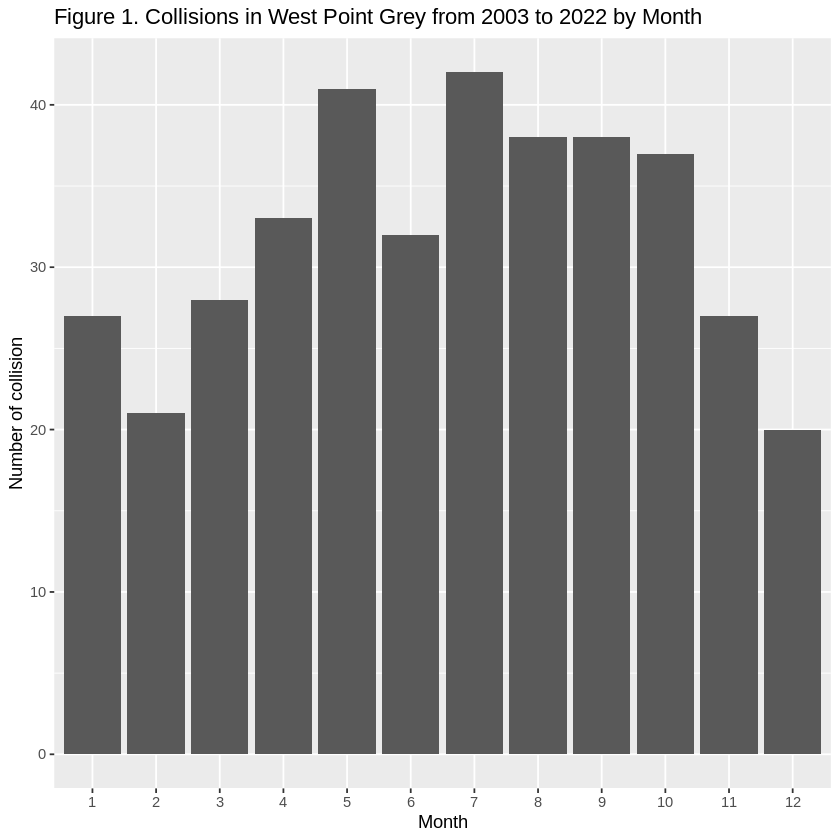

In [5]:
# visualize the oberservation 
collisions_graph <- collisions_by_month %>%
    ggplot(aes(x = MONTH, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Month", y = "Number of collision") +
    ggtitle("Figure 1. Collisions in West Point Grey from 2003 to 2022 by Month")

collisions_graph

As we can see from the graph, there are more number of collisions that happen in the summer (which we classify as April to September) than that happen in the winter (October to March) in West Point Grey neighbourhood from 2003 to 2022.

In [6]:
# data frame that has been grouped by type of crime and Number of observations for each type of crime
collisions_by_type <- collisions %>%
    group_by(TYPE) %>%
    summarise(count = sum(TYPE == TYPE))

# Table: how many observations for each month
kable(collisions_by_type, caption = "Number of observations for each type of crime")




Table: Number of observations for each type of crime

|TYPE                                                   | count|
|:------------------------------------------------------|-----:|
|Vehicle Collision or Pedestrian Struck (with Fatality) |     8|
|Vehicle Collision or Pedestrian Struck (with Injury)   |   376|

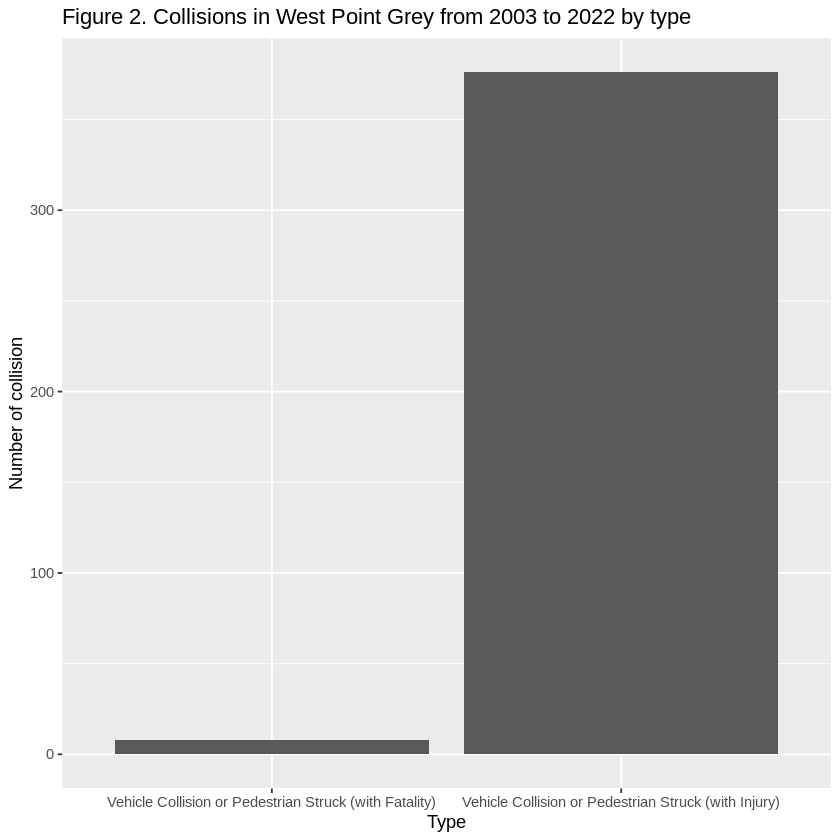

In [7]:
# visualize the oberservation 

collisions_graphs <- collisions_by_type %>%
    ggplot(aes(x = TYPE, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Type", y = "Number of collision") +
    ggtitle("Figure 2. Collisions in West Point Grey from 2003 to 2022 by type")

collisions_graphs

This graph shows that the number of vehicle involved accidents with injuries is much more higher than the fatal accidents including primarily pedestrian or cyclist struck and vehicle to vehicle accidents. That is to say, those fatal incidents make up of a very small portion of the overall data set. 

## Preliminary Results

In [8]:
## draw a sample from the population to calculate the point estimate: sample proportion
set.seed(11)
sample_prop_summer <- crimes %>%
    filter(MONTH == 4| MONTH == 5| MONTH == 6| MONTH == 7| MONTH == 8| MONTH == 9) %>%
    rep_sample_n(size = 1000) %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    nrow()/1000

sample_prop_summer

[1] 0.047

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during summer.

In [9]:
set.seed(12)
sample_prop_winter <- crimes %>%
    filter(MONTH == 10| MONTH == 11| MONTH == 12| MONTH == 1| MONTH == 2| MONTH == 3) %>%
    rep_sample_n(size = 1000) %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    nrow()/1000

sample_prop_winter

[1] 0.032

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during winter.

In [10]:
diff_sample_props <- sample_prop_summer - sample_prop_winter
diff_sample_props

[1] 0.015

0.015 is the difference of the sample proportions between summer and winter.

In [15]:
## create a table to present the sample proportions

tab_prop <- matrix(c(0.047, 0.032, 0.015), ncol=3, byrow=TRUE)
colnames(tab_prop) <- c(" Summer sample prop ", " Winter sample prop ", " Difference in props ")
rownames(tab_prop) <- c("proportion")
tab_prop <- as.table(tab_prop)
tab_prop


            Summer sample prop   Winter sample prop   Difference in props 
proportion                0.047                0.032                 0.015

This table shows the sample proportions in summer and winter and their difference.

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,SEASON
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Non-collision,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027,SUMMER
Non-collision,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,SUMMER
Non-collision,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,SUMMER
Non-collision,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,SUMMER
Non-collision,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,WINTER
Non-collision,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013,WINTER


replicate,stat
<int>,<dbl>
1,0.0019793460
2,0.0028517073
3,-0.0041271830
4,-0.0002015573
5,-0.0015100992
6,-0.0023824605


[1] 0.006341152

p_value
<dbl>
0.15


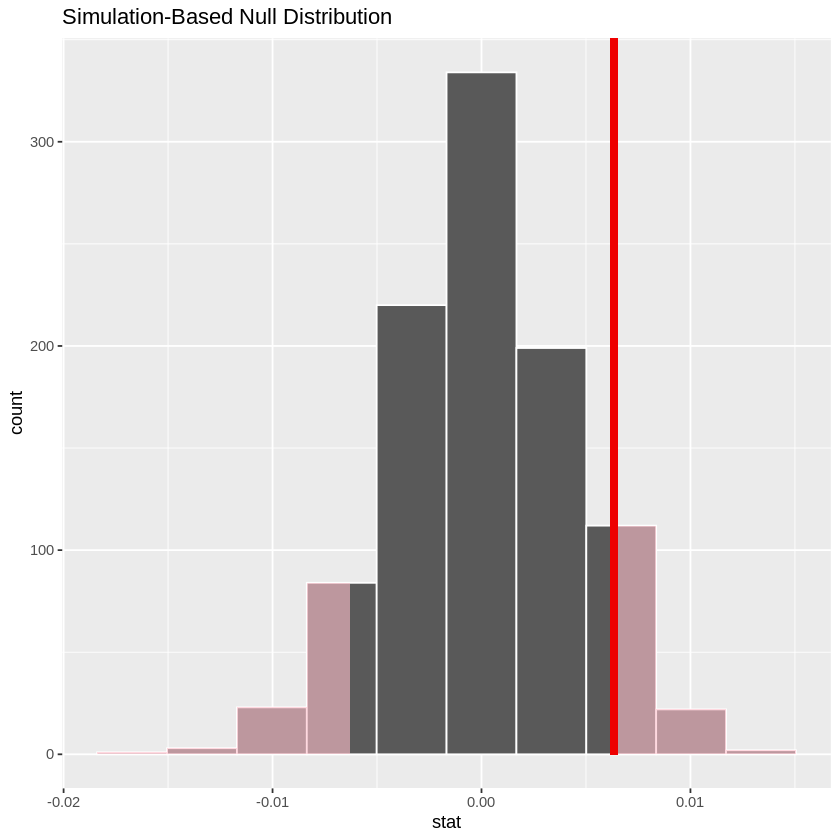

In [29]:
collisions_by_season <- crimes %>%
                        mutate(SEASON = ifelse(MONTH %in% 4:9, "SUMMER", "WINTER")) %>%
                        mutate(TYPE = ifelse(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "Collision", "Non-collision"))

head(collisions_by_season)

collisions_null <- collisions_by_season %>%
    specify(formula = TYPE ~ SEASON, success = "Collision") %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("SUMMER", "WINTER"))
head(collisions_null)

obs_diff_in_prop <- collisions_by_season %>%
    specify(formula = TYPE ~ SEASON, success = "Collision") %>%
    calculate(stat = "diff in props", order = c("SUMMER", "WINTER")) %>%
    pull()
obs_diff_in_prop

p_value <- collisions_null %>%
        get_p_value(obs_stat = obs_diff_in_prop, direction = "both")
p_value

collisions_result_plot <- collisions_null %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_prop, direction = "both")
collisions_result_plot

## Methods: Plan
So far the advantages of our report are that it contains data from a credible source and that we have done a rough prelimnary analysis by computing the sample proportions of accidents that occur in each of the two seasons from our sample neighbourhood. However, the analysis done so far is only based on one sample from our chosen neighbourhood, which would make it hard for us to generalize our results to our population of all car accidents in Vancouver.

To address this problem, the following steps will be taken to generalize our findings to our population: 
- First, the original crimes data set is altered using mutate along with if-else.

- A new column SEASON is added which has values “SUMMER”, for months April to September (4:9), and “WINTER”, for months October to March (1:3, and 10:12). 

- The values of the TYPE column are also changed to either “Collision” for a vehicular collision-based crime and “Non-collision” for any other type of crime.

- We then go onto find the observed test statistic value from our altered data set which is the difference between the proportion of accidents in summer and winter months and use pull() to get a numeric value.

- The hypothesis testing is done based on the following: 
                               NULL HYPOTHESIS 
H0: The proportion of accidents in summer and winter months is the same
                                              vs 
                             ALTERNATE HYPOTHESIS
HA: The proportion of accidents in summer and winter months is not the same

- For the Null hypothesis we use infer package workflow and specify our variables of interest: TYPE and SEASON with success argument set to “Collision”. We then assume the null hypothesis is true and generate a resampling distribution of type “permute”. Finally, we calculate the difference in proportion of accidents between the summer and winter months and go on to find the corresponding p-value. 
 
- To create the corresponding bootstrap distribution needed to construct a 95% confidence interval for the difference in proportion between summer and winter accidents, we make two changes. We remove the hypothesize() step from the infer package workflow as we no longer assume the null hypothesis is true. We also switch the type of resampling from “permute” to “bootstrap”. From this bootstrapped distribution we go on to find the confidence intervals and continue with the final steps of our testing.


Ultimately, we expect to find a relationship between the time of year and the occurrence of car accidents in Vancouver. We hope that if the said relationship is significant, it can help raise awareness to driving hazards at a particular time of year. We also hope our findings can give rise to possible future investigations on third variables related to seasonal changes that are possibly influencing our relationship of interest.

## References

International Overview. (2021, May 06). Retrieved from
    https://injuryfacts.nsc.org/international/international-overview/#:~:text=Motor-vehicle injuries are the,the world,
    with 84,000 fatalities.

Transport Canada. (2021, June 11). Canadian Motor Vehicle Traffic Collision Statistics: 2019. Retrieved from
    https://tc.canada.ca/en/road-transportation/statistics-data/canadian-motor-vehicle-traffic-collision-statistics-2019
